**PROBLEM STATEMENT:**

Detecting bone fractures from X-ray images is critical for timely medical intervention. This project aims to develop a convolutional neural network (CNN) model to accurately classify X-ray images as fractured or non-fractured, facilitating quicker diagnosis and treatment decisions.

[Source](https://ieeexplore.ieee.org/document/10435047)


**Challenges:**


1.   Overfitting due to limited data.
2.   Possibility of class imbalancing



**Solutions:**


1.   The model architecture features convolutional, batch normalization, max-pooling, and dropout layers to extract and down-sample feature maps while preventing overfitting.
2.   Dense layers with ReLU activation process the flattened feature maps, culminating in a sigmoid-activated output layer for binary classification.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''This code installs the Kaggle API, sets up the Kaggle configuration file,
 downloads a dataset ("bone-fracture-dataset") from Kaggle,
 and extracts its contents to the "/content" directory.'''
!pip install kaggle

!mkdir ~/.kaggle

!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d ahmedashrafahmed/bone-fracture -p /content

import zipfile
with zipfile.ZipFile("/content/bone-fracture.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

import os
print(os.listdir("/content"))


cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/ahmedashrafahmed/bone-fracture
License(s): unknown
 92% 81.0M/88.4M [00:01<00:00, 54.9MB/s]
100% 88.4M/88.4M [00:01<00:00, 59.6MB/s]
['.config', 'drive', 'dataset', 'bone-fracture.zip', 'sample_data']


In [ ]:
'''This code loads images and their corresponding labels from directories representing
 training, testing, and validation datasets, resizing the images to 128x128 pixels and
 normalizing pixel values to the range [0, 1].'''
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images_and_labels(directory, target_size):

    images = []
    labels = []

    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            for filename in os.listdir(label_path):
                if filename.endswith('.jpg') or filename.endswith('.png'):
                    image_path = os.path.join(label_path, filename)
                    img = load_img(image_path, target_size=target_size)
                    img_array = img_to_array(img) / 255.0
                    images.append(img_array)
                    labels.append(label)

    return np.array(images), np.array(labels)

train_dir = 'dataset/train'
test_dir = 'dataset/test'
val_dir = 'dataset/val'

train_images, train_labels = load_images_and_labels(train_dir, target_size=(128, 128))
test_images, test_labels = load_images_and_labels(test_dir, target_size=(128, 128))
val_images, val_labels = load_images_and_labels(val_dir, target_size=(128, 128))


Train Images


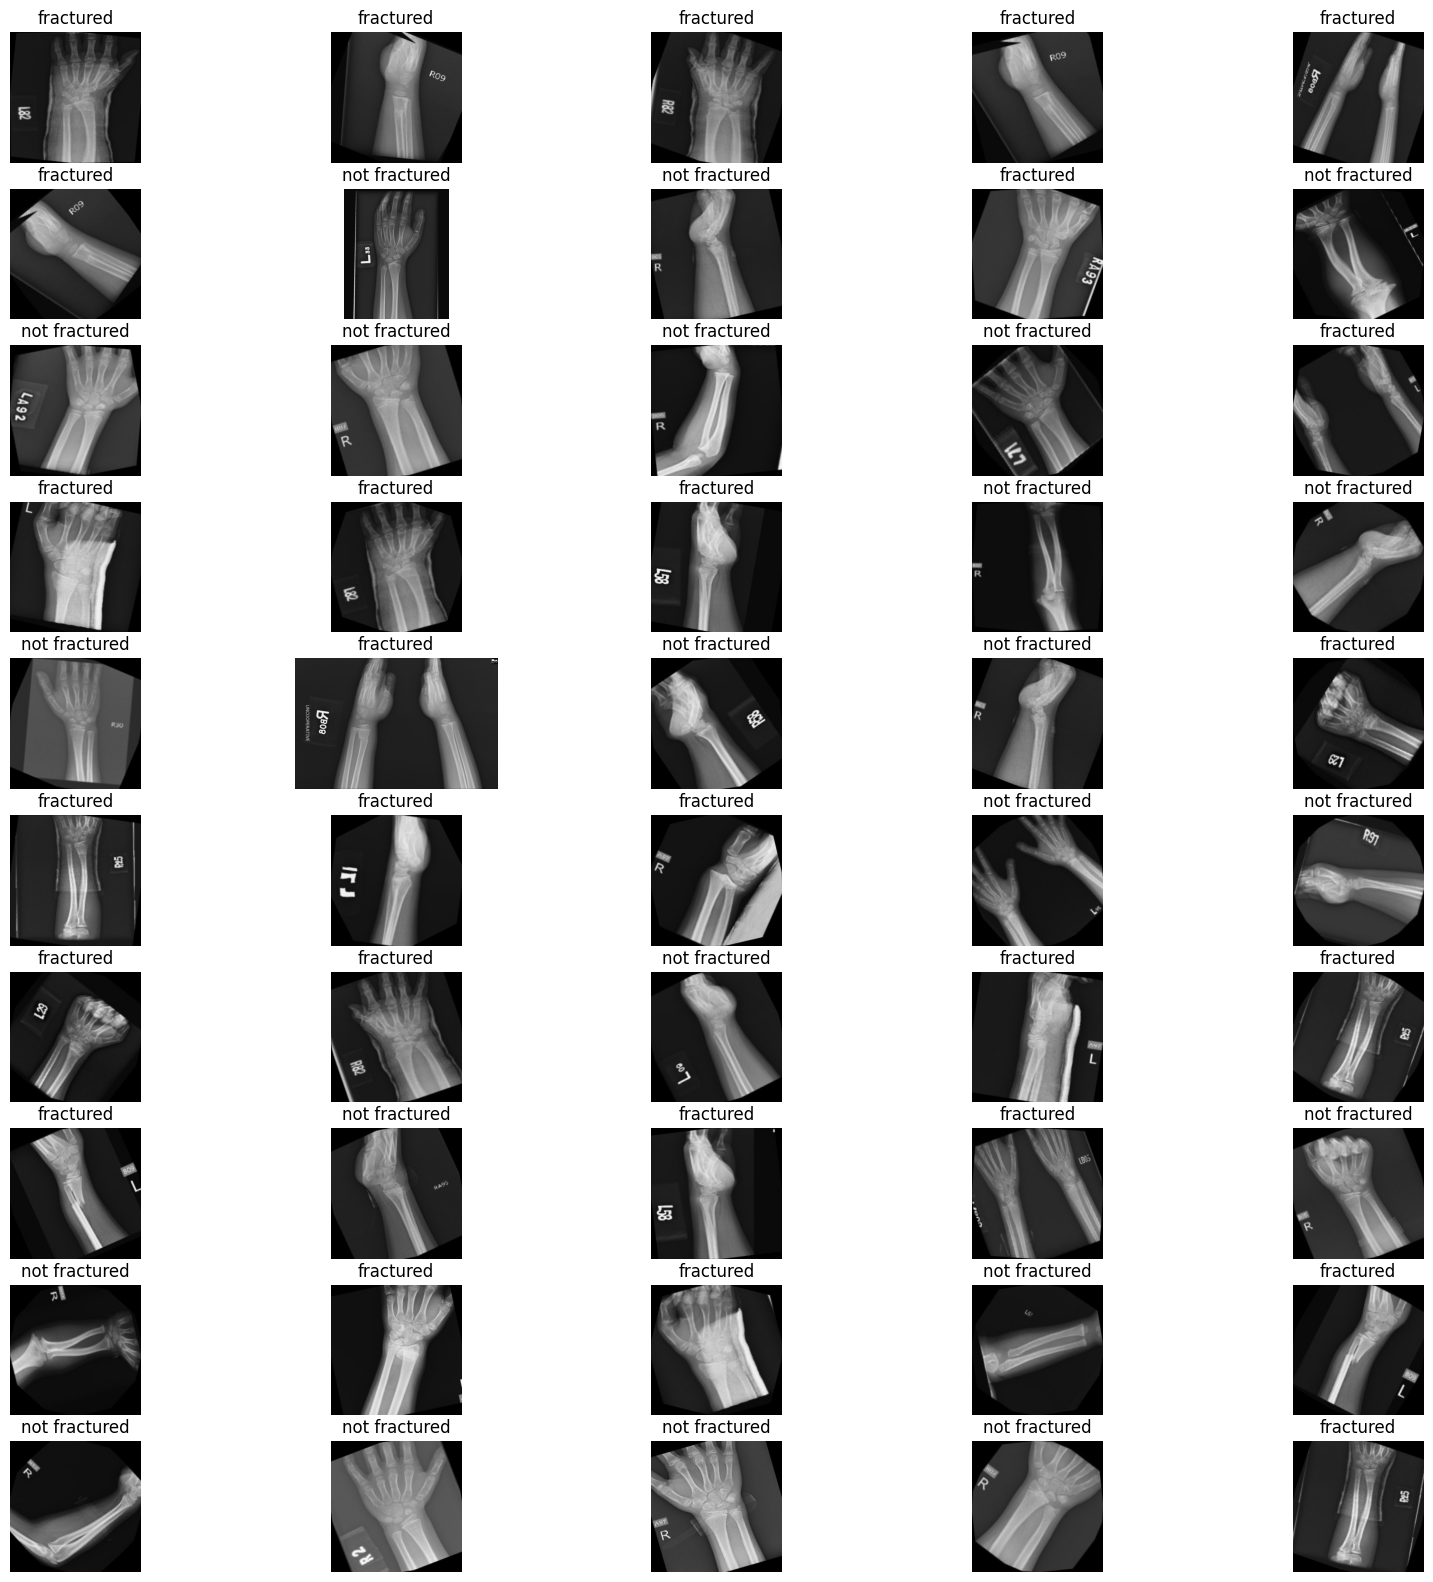

Test Images


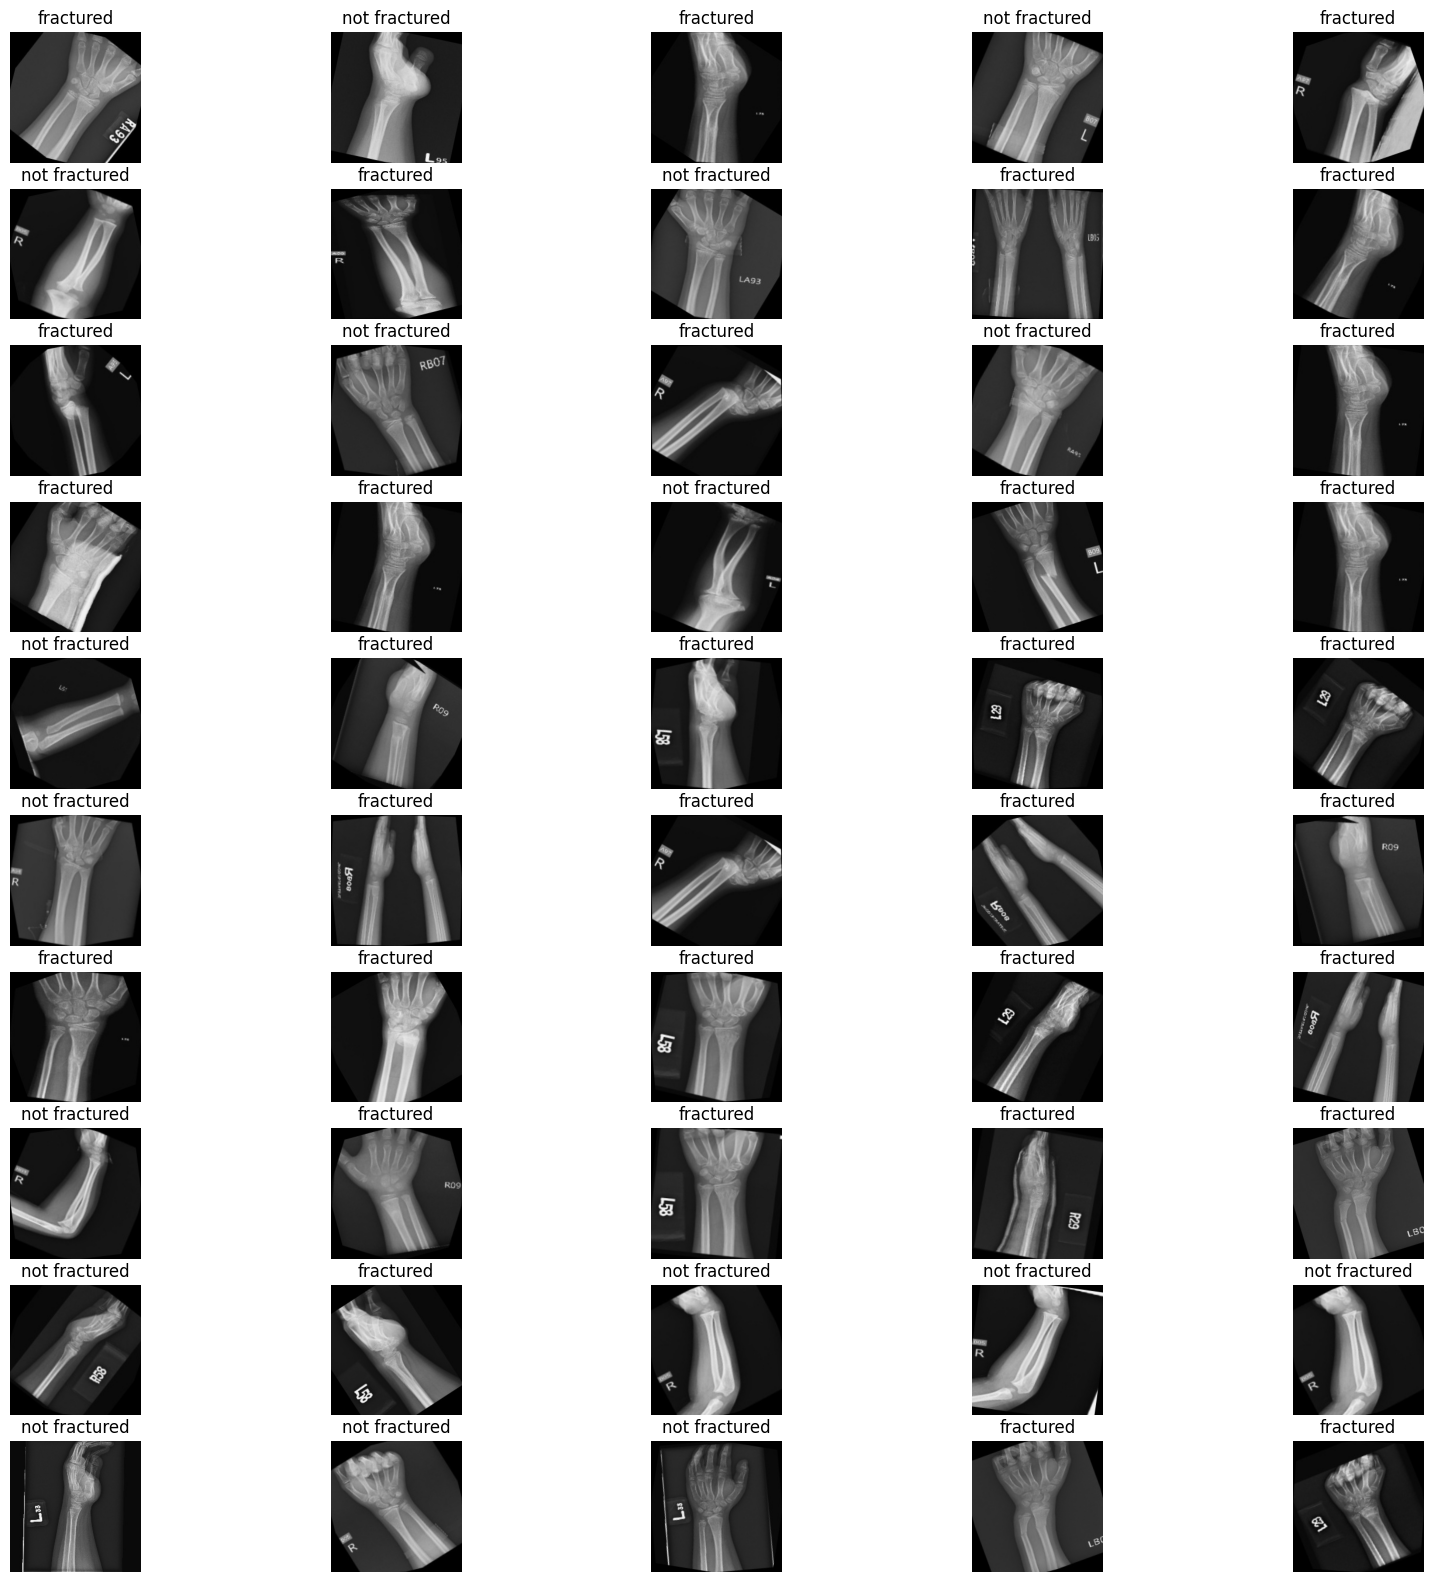

Validation Images


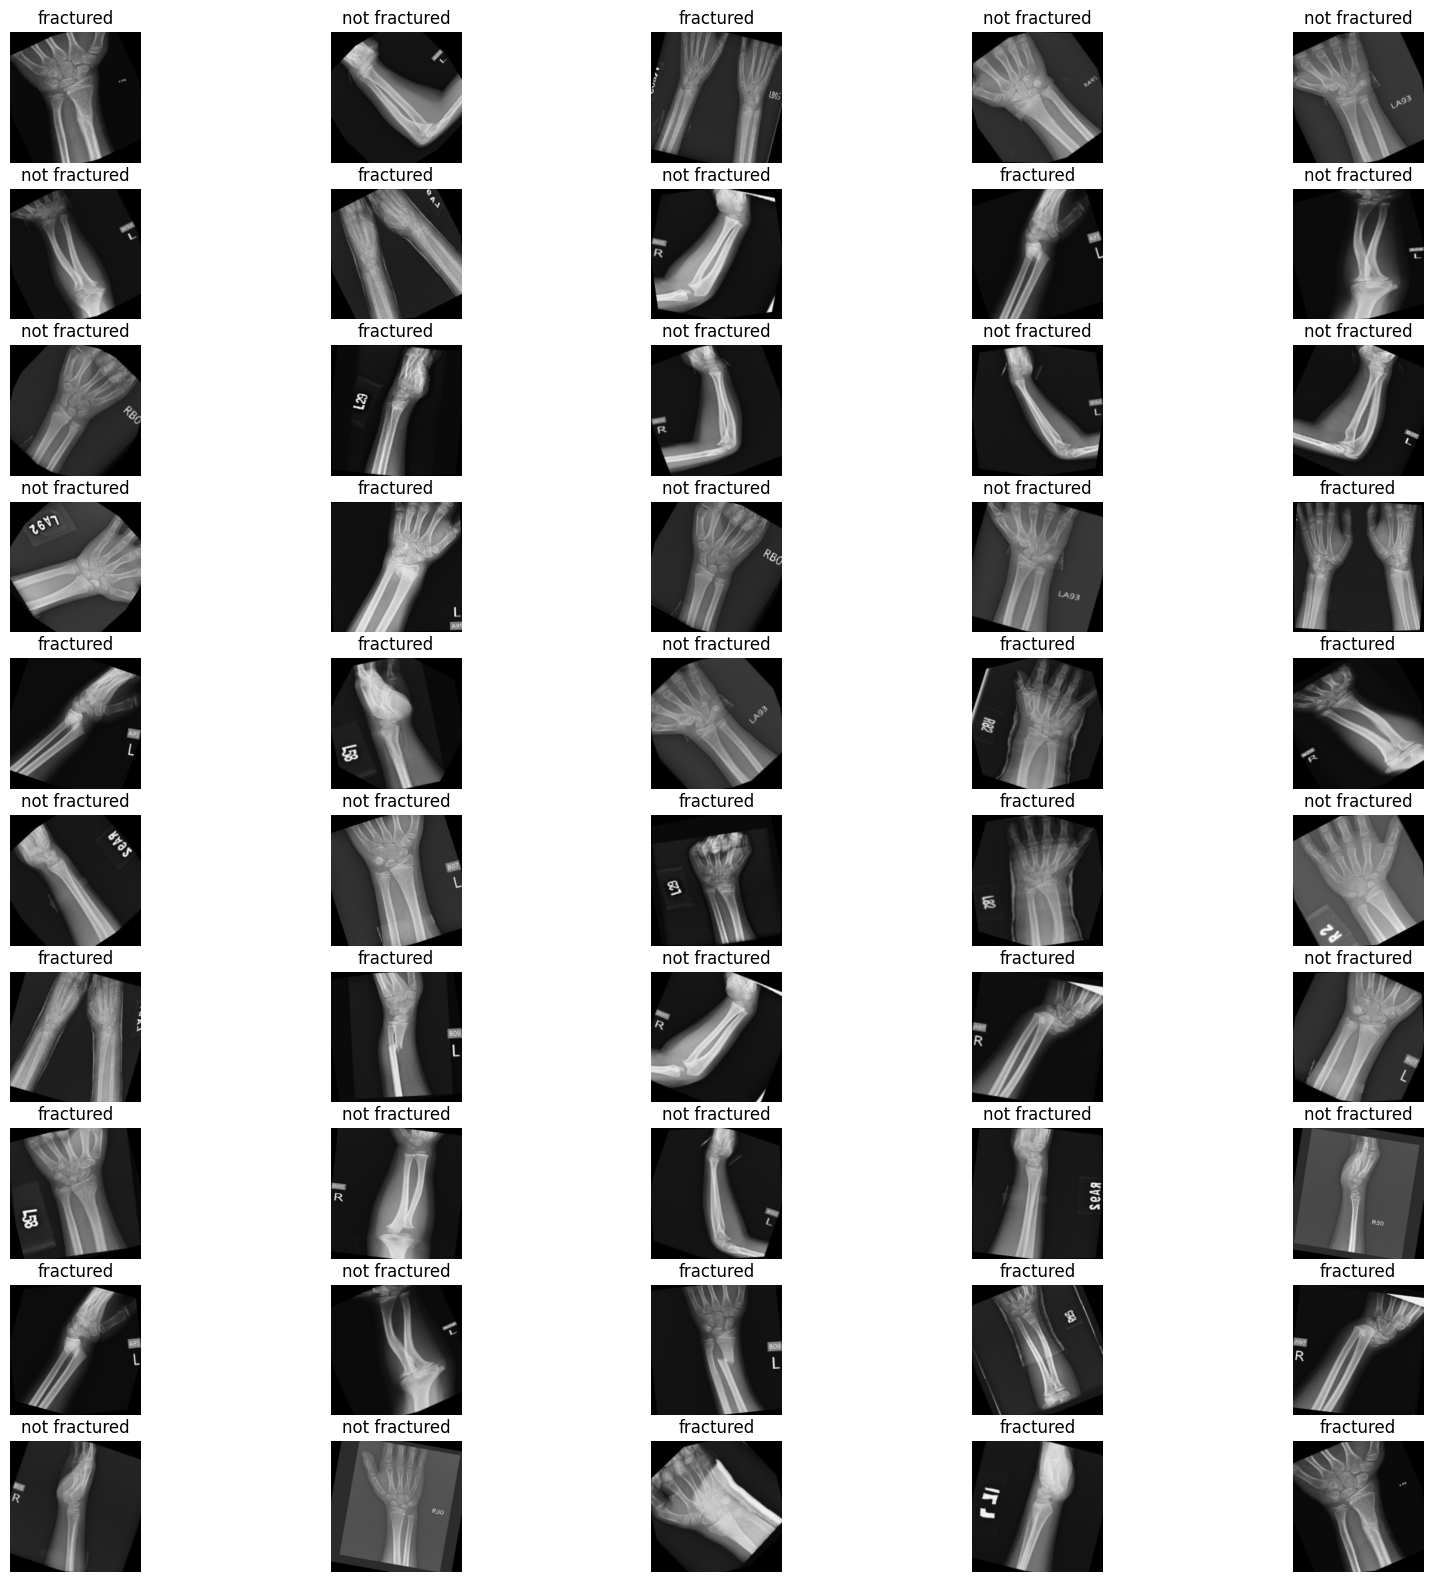

In [ ]:
'''This code reads images and their corresponding labels from the
directory, visualizes a random sample of 50 images with their labels using
matplotlib and OpenCV libraries.'''
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

def visualize_images(directory, num_images=50):
    images = []
    labels = []

    if os.path.isdir(directory):
        for label in os.listdir(directory):
            label_dir = os.path.join(directory, label)
            if os.path.isdir(label_dir):
                for image_file in os.listdir(label_dir):
                    if image_file.endswith('.jpg') or image_file.endswith('.png'):
                        images.append(os.path.join(label_dir, image_file))
                        labels.append(label)

    plt.figure(figsize=(20, 20))
    for n, i in enumerate(np.random.randint(0, len(images), num_images)):
        plt.subplot(10, 5, n + 1)
        img = cv2.imread(images[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis('off')
        plt.title(labels[i], fontsize=12)

    plt.show()

train_dir = 'dataset/train'
test_dir = 'dataset/test'
val_dir = 'dataset/val'

print("Train Images")
visualize_images(train_dir)
print("Test Images")
visualize_images(test_dir)
print("Validation Images")
visualize_images(val_dir)


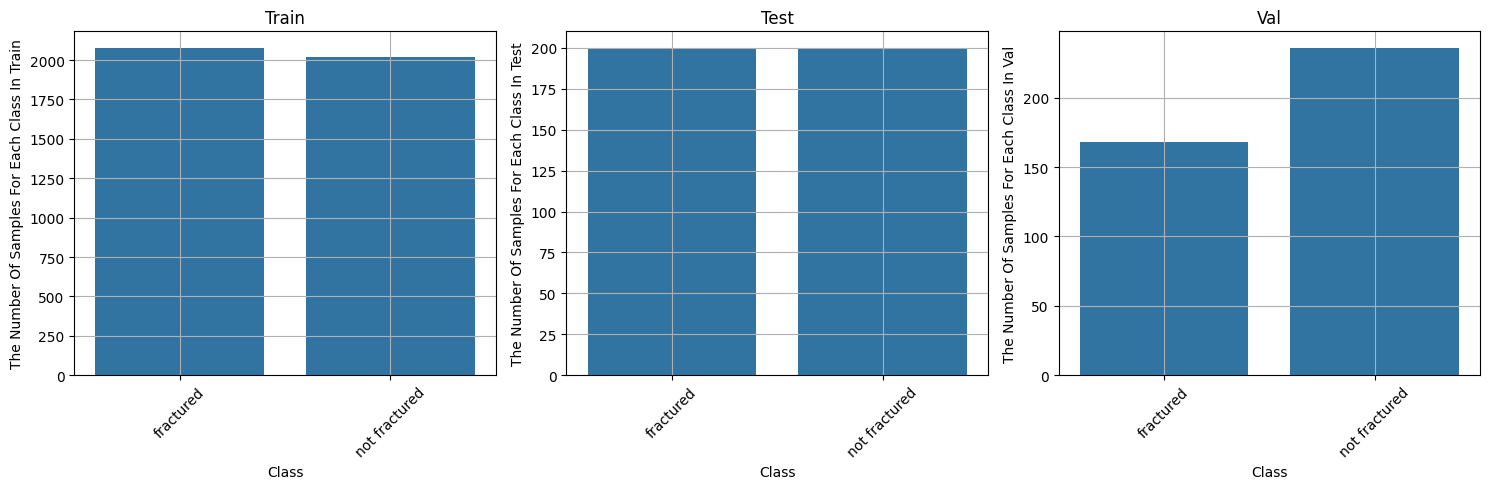

In [ ]:
'''This code visualizes the distribution of classes in the training, validation,
and test datasets using seaborn and matplotlib libraries. '''
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

train = pd.DataFrame(train_labels, columns=['label'])
test = pd.DataFrame(test_labels, columns=['label'])
val = pd.DataFrame(val_labels, columns=['label'])


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
ax = sns.countplot(x=train.label)
ax.set_xlabel("Class")
ax.set_ylabel("The Number Of Samples For Each Class In Train")
plt.title('Train')
plt.grid(True)
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
ax = sns.countplot(x=test.label)
ax.set_xlabel("Class")
ax.set_ylabel("The Number Of Samples For Each Class In Test")
plt.title('Test')
plt.grid(True)
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
ax = sns.countplot(x=val.label)
ax.set_xlabel("Class")
ax.set_ylabel("The Number Of Samples For Each Class In Val")
plt.title('Val')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
'''This code creates data generators for training, validation, and testing
datasets stored in directories 'dataset/train' and 'dataset/test', performing data augmentation
and rescaling pixel values for the training set.'''
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'dataset/train'
test_dir = 'dataset/test'
val_dir = 'dataset/val'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 4097 images belonging to 2 classes.
Found 404 images belonging to 2 classes.
Found 399 images belonging to 2 classes.


In [ ]:
'''This code constructs a convolutional neural network (CNN) model for binary
classification tasks. The model architecture includes convolutional, batch
normalization, max-pooling, and dropout layers followed by dense layers for
classification. The model is compiled with the Adam optimizer and binary
cross-entropy loss function.'''
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
import tensorflow.keras.metrics

class_num = 1

model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(class_num, activation='sigmoid')
])

model.summary()

model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.AUC()])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                                                
                                                        

In [ ]:
'''This code defines a learning rate scheduler function `lr_scheduler`, which
reduces the learning rate by a factor of 0.1 every 5 epochs, except for the
first epoch. It also sets up an early stopping callback to stop training if
validation loss does not improve for 5 consecutive epochs, restoring the best weights. Additionally, it creates a learning rate scheduler callback `lr_callback` using the defined scheduler function.'''
def lr_scheduler(epoch, lr):
    if epoch % 5 == 0 and epoch != 0:
        return lr * 0.1
    else:
        return lr

early_stopping = callbacks.EarlyStopping( patience=5, restore_best_weights=True)
lr_callback = callbacks.LearningRateScheduler(lr_scheduler)


In [ ]:
'''This code trains the defined model using the training generator and validates
it on the validation generator for 10 epochs, utilizing the above callbacks.
'''
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stopping, lr_callback]
)

Epoch 1/10
129/129 [==============================] - 33s 173ms/step - loss: 1.3139 - accuracy: 0.6290 - auc: 0.6698 - val_loss: 1.0790 - val_accuracy: 0.5817 - val_auc: 0.5381 - lr: 0.0010
Epoch 2/10
129/129 [==============================] - 22s 172ms/step - loss: 0.6197 - accuracy: 0.7266 - auc: 0.8064 - val_loss: 1.0048 - val_accuracy: 0.5718 - val_auc: 0.5808 - lr: 0.0010
Epoch 3/10
129/129 [==============================] - 22s 171ms/step - loss: 0.4537 - accuracy: 0.7938 - auc: 0.8787 - val_loss: 1.4393 - val_accuracy: 0.6634 - val_auc: 0.6817 - lr: 0.0010
Epoch 4/10
129/129 [==============================] - 22s 174ms/step - loss: 0.4073 - accuracy: 0.8330 - auc: 0.9098 - val_loss: 0.4942 - val_accuracy: 0.7203 - val_auc: 0.8425 - lr: 0.0010
Epoch 5/10
129/129 [==============================] - 21s 160ms/step - loss: 0.3367 - accuracy: 0.8621 - auc: 0.9336 - val_loss: 0.1956 - val_accuracy: 0.9158 - val_auc: 0.9752 - lr: 0.0010
Epoch 6/10
129/129 [==============================

In [ ]:
'''After training, it evaluates the model's performance on the test data and
prints the test loss and accuracy.'''
test_loss, test_accuracy, AUC = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Test AUC:", AUC)

13/13 [==============================] - 1s 59ms/step - loss: 0.1054 - accuracy: 0.9599 - auc: 0.9947
Test Loss: 0.10541658848524094
Test Accuracy: 0.9598997235298157
Test AUC: 0.9946607351303101


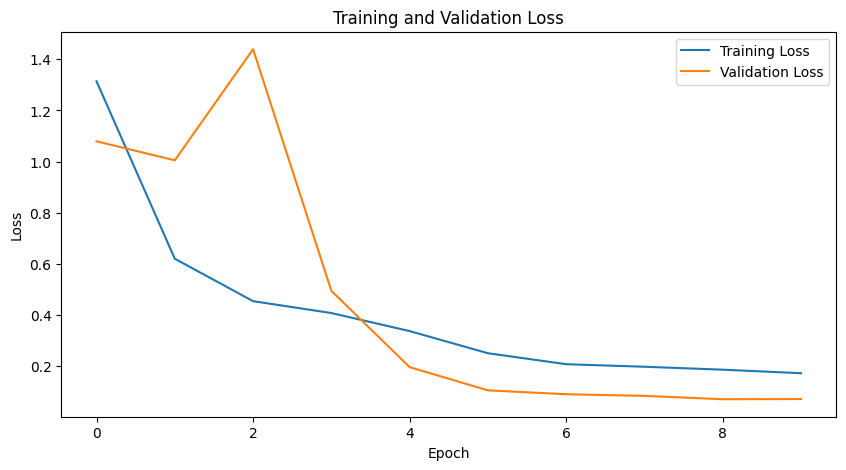

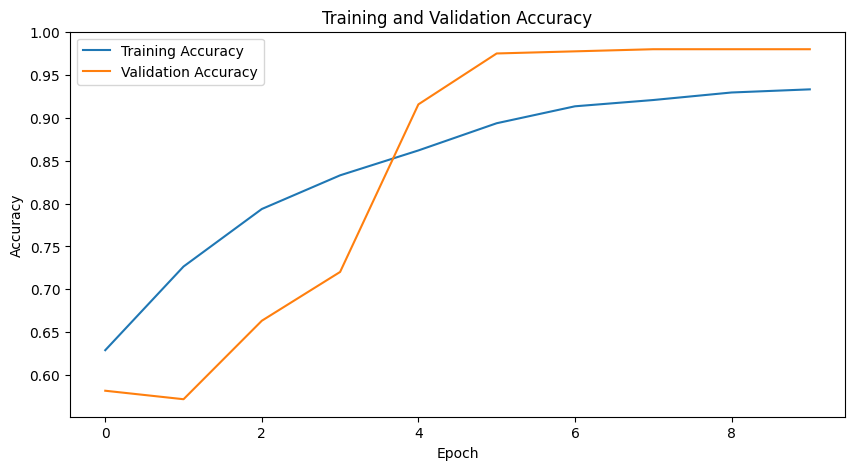

In [ ]:
'''This code plots the training and validation loss, and the training and
validation accuracy over the epochs of the model training process, providing a
visual representation of the model's performance during training.'''
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
